In [1]:
#pip install kagglehub

In [41]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\miadul\brain-tumor-dataset\versions\1


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler



In [43]:
df=pd.read_csv(f"{path}/brain_tumor_dataset.csv")


In [44]:
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

In [46]:
df.duplicated().sum()

0

In [47]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

In [48]:
df['Tumor_Type'].unique()

array(['Malignant', 'Benign'], dtype=object)

In [49]:
df['Tumor_Type'].nunique()

2

In [50]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [51]:
df.tail()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No
19999,20000,61,Male,Benign,9.716768,Temporal,Medulloblastoma,I,Vision Issues,Seizures,Nausea,No,No,No,47.433468,2.464077,Yes,Negative,Yes


In [52]:
df.shape

(20000, 19)

In [53]:
df.isna()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
df[df['Age'] >= 30] 

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
6,7,72,Male,Malignant,8.026672,Occipital,Meningioma,IV,Vision Issues,Headache,Nausea,Yes,No,Yes,69.825016,2.965008,No,Negative,No
7,8,61,Male,Benign,6.319362,Occipital,Astrocytoma,I,Headache,Seizures,Nausea,Yes,Yes,No,62.775921,2.269111,No,Negative,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19995,62,Female,Benign,2.872689,Frontal,Meningioma,IV,Seizures,Nausea,Headache,Yes,No,No,87.574088,0.903568,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


In [55]:
tumor_mapping = {'Benign': 1, 'Malignant': 0}

df["Tumor_Type"] = df['Tumor_Type'].map(tumor_mapping)

In [56]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to multiple columns
for col in ["Gender", "Location", "Histology", "Symptom_1", "Symptom_2", "Symptom_3", "Radiation_Treatment", "Surgery_Performed", "Chemotherapy", "Family_History", "Stage", "MRI_Result", "Follow_Up_Required"]:
    df[col] = encoder.fit_transform(df[col])



In [57]:
df.select_dtypes(include=["number"]).corr().sort_values(by = "MRI_Result", ascending = False)

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
MRI_Result,-0.001145,-0.001631,-0.001095,-0.000891,0.014411,-0.000753,0.011237,-0.008948,-0.002491,-0.002560,0.006797,0.002194,0.002283,0.007772,-0.001540,-0.001486,0.000301,1.000000,-0.001829
Tumor_Size,0.007371,-0.014385,0.008140,0.014354,1.000000,-0.008254,0.001451,0.009682,0.008697,-0.018535,-0.004087,-0.015159,-0.005077,0.010469,0.003295,0.004347,0.007195,0.014411,-0.009102
Histology,-0.009851,0.002576,-0.002773,-0.002230,0.001451,0.002536,1.000000,-0.007714,-0.011826,0.002669,0.012290,0.001203,-0.004321,0.001715,0.000032,0.004425,-0.008602,0.011237,0.001356
Chemotherapy,-0.012010,-0.005843,0.006516,-0.004671,0.010469,0.007282,0.001715,0.004881,0.012833,0.000629,0.008742,0.010380,0.002842,1.000000,0.000706,-0.004694,0.016103,0.007772,-0.000698
Symptom_3,0.000831,-0.005988,0.012145,-0.005856,-0.004087,-0.002772,0.012290,-0.015596,0.005305,-0.001158,1.000000,0.000440,-0.006787,0.008742,0.001752,0.005069,0.006764,0.006797,0.003903
Surgery_Performed,0.000410,-0.007850,0.002210,0.003818,-0.005077,0.003268,-0.004321,-0.005216,0.002755,-0.004585,-0.006787,-0.003913,1.000000,0.002842,0.007929,-0.001890,-0.002799,0.002283,-0.003761
Radiation_Treatment,0.006357,-0.002548,0.002303,-0.009494,-0.015159,-0.007529,0.001203,0.008880,0.001351,0.001734,0.000440,1.000000,-0.003913,0.010380,0.004741,0.009088,0.006300,0.002194,-0.010622
Family_History,-0.001789,0.005474,0.001000,-0.000201,0.007195,-0.004239,-0.008602,0.004256,-0.003623,0.004202,0.006764,0.006300,-0.002799,0.016103,-0.004192,-0.001102,1.000000,0.000301,0.001302
Location,-0.001760,-0.004307,0.001763,-0.013310,-0.008254,1.000000,0.002536,-0.000702,-0.003413,0.002796,-0.002772,-0.007529,0.003268,0.007282,-0.004252,-0.003018,-0.004239,-0.000753,-0.003440
Tumor_Type,0.000651,-0.005734,0.003795,1.000000,0.014354,-0.013310,-0.002230,0.009620,-0.000684,-0.012770,-0.005856,-0.009494,0.003818,-0.004671,0.002703,0.000502,-0.000201,-0.000891,-0.013870


In [19]:
training_columns = ["Tumor_Size", "Histology", "Symptom_3"]

X = df[training_columns]
y = df["MRI_Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

In [58]:
X_train

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,Follow_Up_Required
17218,69,1,1,1.466639,1,1,3,2,0,2,0,0,0,88.554940,1.760554,0,1
15188,74,1,0,1.231541,3,1,2,1,3,0,1,0,1,89.613276,2.310762,1,1
11295,31,1,1,5.340939,1,0,3,0,1,2,0,0,1,40.636728,2.673835,1,1
19772,33,1,1,0.521783,0,2,0,0,0,0,0,1,1,87.864727,1.522874,1,0
13072,54,1,0,4.714079,3,0,2,2,0,1,1,1,0,79.154867,2.901818,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,53,0,0,8.574564,0,3,0,0,3,2,0,1,1,64.500978,1.801410,0,0
11964,30,0,1,8.542621,1,1,3,0,3,0,0,1,0,59.811256,2.859699,0,0
5390,39,0,0,4.494778,0,1,0,2,0,0,1,0,0,83.809921,2.680145,0,1
860,38,1,1,1.018247,3,3,0,3,0,3,0,0,1,97.815429,1.272110,0,0


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


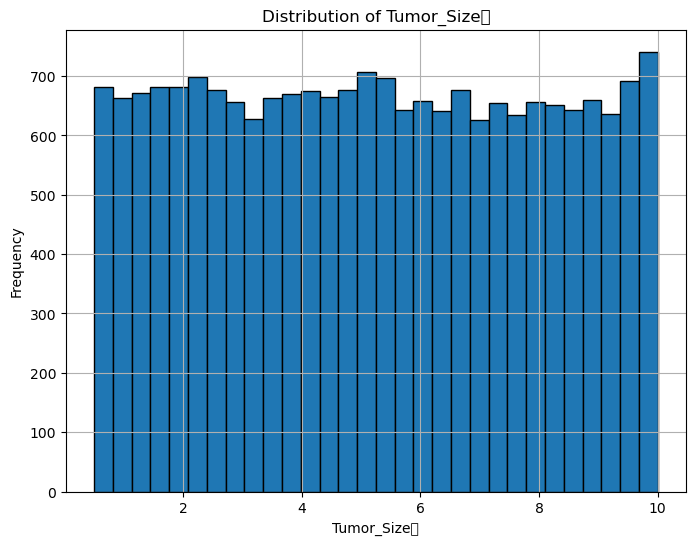

In [21]:
# Plot 1: Histogram of Glucose levels
#Histogram of Glucose distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Tumor_Size'], bins=30, edgecolor='black')
plt.title('Distribution of Tumor_Size	')
plt.xlabel('Tumor_Size	')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

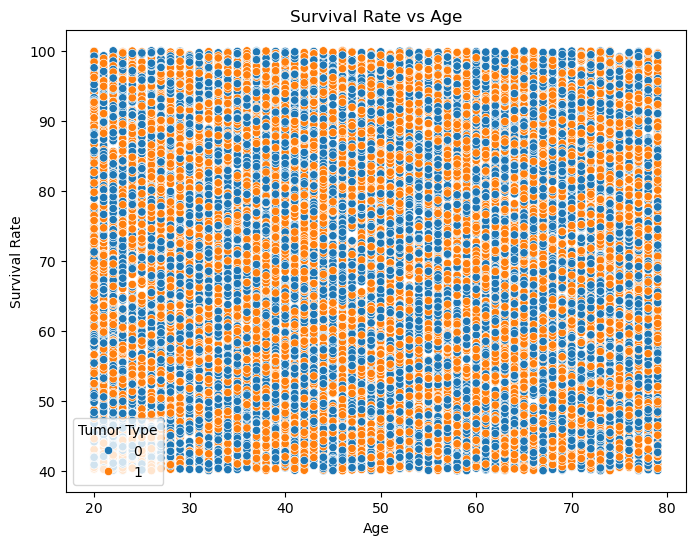

In [62]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y='Survival_Rate', hue='Tumor_Type', data=df)
plt.title('Survival Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.legend(title='Tumor Type')
plt.show()


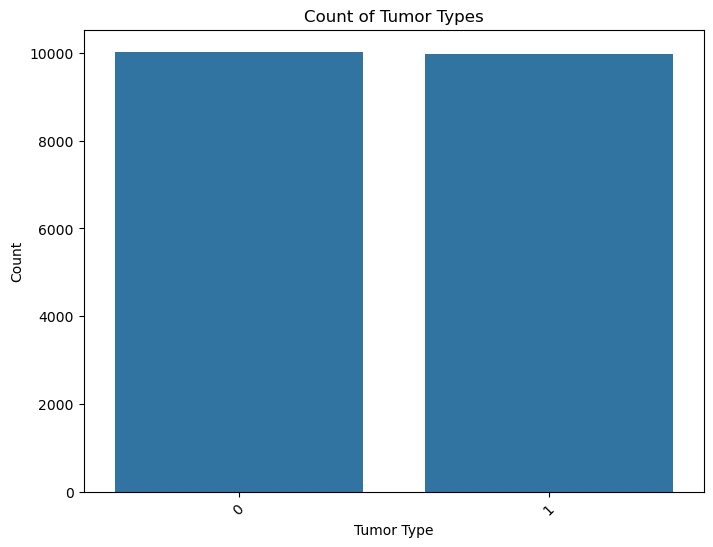

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tumor_Type', data=df)
plt.title('Count of Tumor Types')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


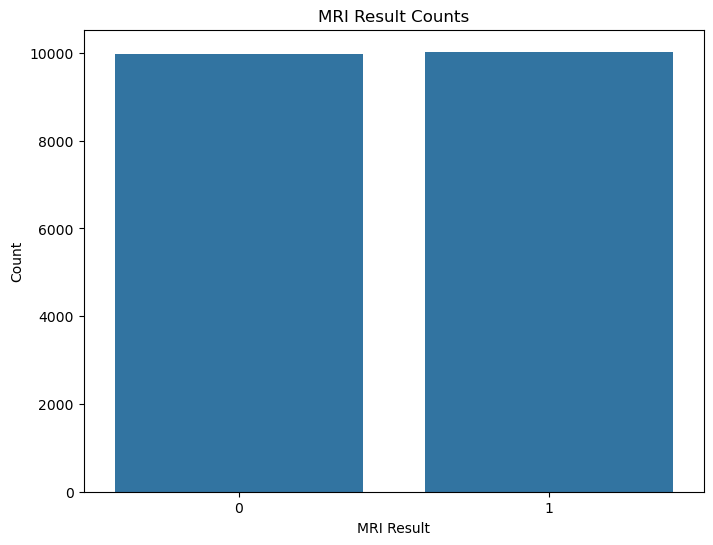

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MRI_Result', data=df)
plt.title('MRI Result Counts')
plt.xlabel('MRI Result')
plt.ylabel('Count')
plt.show()


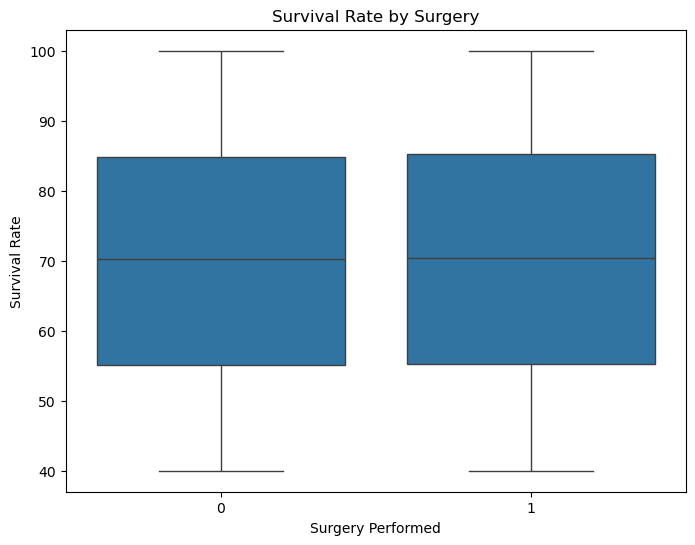

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Surgery_Performed', y='Survival_Rate', data=df)
plt.title('Survival Rate by Surgery')
plt.xlabel('Surgery Performed')
plt.ylabel('Survival Rate')
plt.show()


In [26]:
X = df[['Tumor_Growth_Rate', 'Tumor_Size']]
y = df['Survival_Rate']



In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
# Predict on test set
y_pred = model.predict(X_test)


In [30]:
threshold = y.median()
y_test_cat = (y_test >= threshold).astype(int)
y_pred_cat = (y_pred >= threshold).astype(int)


In [31]:
accuracy = accuracy_score(y_test_cat, y_pred_cat)


In [32]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat)


In [33]:
# Generate classification report
report = classification_report(y_test_cat, y_pred_cat)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Print the results in the same format as you want
print(f"SVM Model Accuracy: {accuracy * 100:.2f} %\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)


SVM Model Accuracy: 49.18 %

Confusion Matrix:
[[1967    0]
 [2033    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1967
           1       0.00      0.00      0.00      2033

    accuracy                           0.49      4000
   macro avg       0.25      0.50      0.33      4000
weighted avg       0.24      0.49      0.32      4000



In [35]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

In [36]:
X = df[['Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History','Follow_Up_Required']]
y = df['MRI_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.3)

In [37]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.52      0.51      2994
           1       0.50      0.47      0.48      3006

    accuracy                           0.49      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.49      0.49      0.49      6000



In [38]:
#hyper parameter tuning
model = RandomForestClassifier(n_estimators = 100, max_depth = 5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46      2994
           1       0.51      0.59      0.54      3006

    accuracy                           0.51      6000
   macro avg       0.51      0.50      0.50      6000
weighted avg       0.51      0.51      0.50      6000



In [39]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48      2994
           1       0.50      0.52      0.51      3006

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



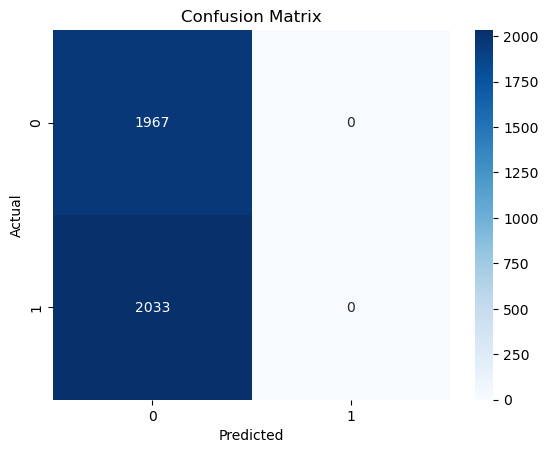

In [40]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
